# Modeling exercise

In [37]:
import pandas as pd
import numpy as np
import plotly_express as px
import ipywidgets as widgets

In [38]:
slope, intercept = 2.5, 6

In [39]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [40]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

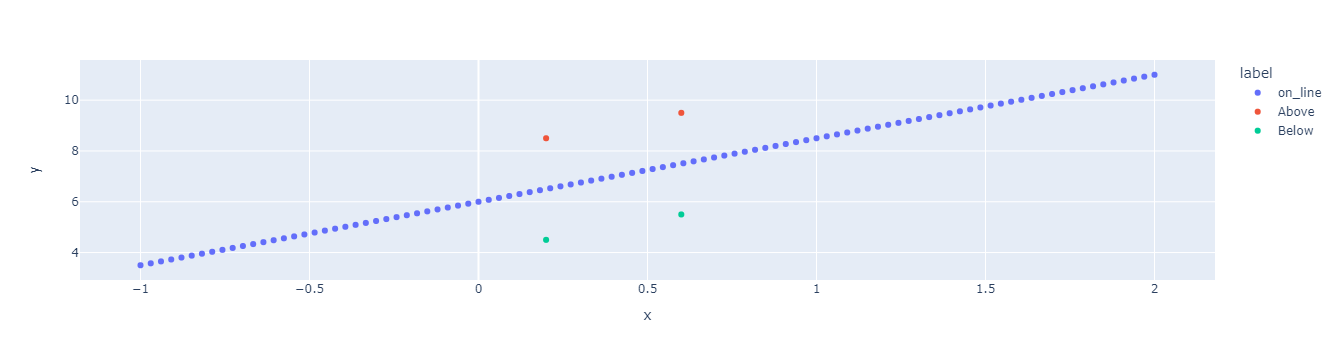

In [41]:
px.scatter(data, x='x', y='y', color = 'label')

## Fitting and Overfiting 

The goal of the following exercise is to observe overfitting causes:
* Overfitting due to insuffient data
* Overfitting due to overly complex model


For each below dataset:
* Create data of size N with noise level of magnitude NL. 
* Split it to training and testing data
* Choose a complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
* Train on the train test for different hyper parameter values. compute:
  * Classification accuracy on the training set (TRE)
  * Classification accuracy on the testing set (TESTE)
  * The difference beteen the two above (E_DIFF)
* Save N, NL, TRE, TESTE, E_DIFF and the regularization param (K, gamma or min_samples_split)

Repeat for N in range 50 to 10000 and NL in range 0 to 0.5. Create a proper dataframe from the results and analyze:
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? 
1. Select the best model param to fit the data (The one minimizing the test error) and for it, observe the number of data points needed for optimal test results in different noise levels.

## Moons dataset

In [42]:
from sklearn.datasets import make_moons

In [43]:
points, label = make_moons(n_samples=1000, noise=0.25)
moons_df = pd.DataFrame(points, columns=['x','y'])
moons_df['label'] = label
moons_df.label = moons_df.label.map({0:'A', 1:'B'})
moons_df.head()

,x,y,label
0,0.168332,0.865590,A
1,-1.028385,0.730645,A
2,0.926418,0.632168,A
3,1.651688,-0.095453,B
4,0.483304,-0.646687,B


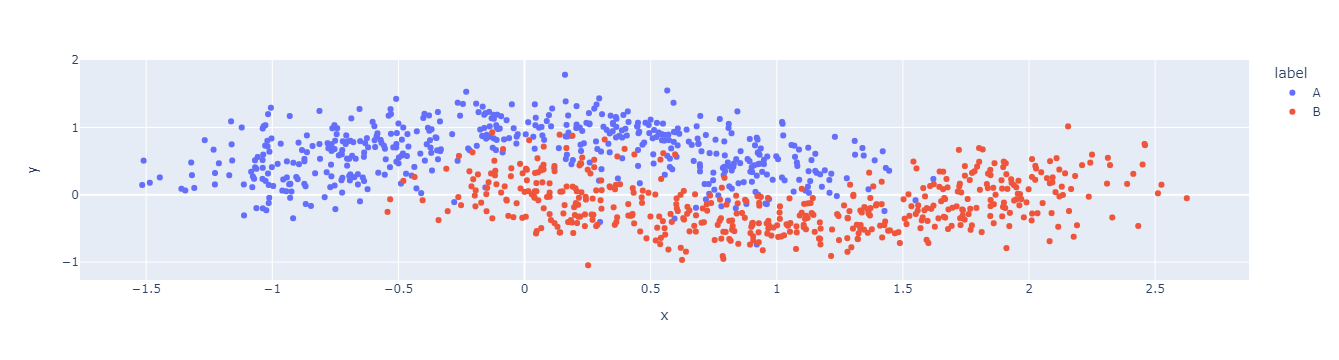

In [44]:
px.scatter(moons_df, x='x', y='y', color = 'label')

In [45]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    points, label = make_moons(n_samples=1000, noise=noise_level)
    moons_df = pd.DataFrame(points, columns=['x','y'])
    moons_df['label'] = label
    moons_df.label = moons_df.label.map({0:'A', 1:'B'})
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [46]:
from sklearn.datasets import make_circles

In [47]:
def make_circles_dataframe(n_samples, noise_level):
    points, label = make_circles(n_samples=n_samples, noise=noise_level)
    circles_df = pd.DataFrame(points, columns=['x','y'])
    circles_df['label'] = label
    circles_df.label = circles_df.label.map({0:'A', 1:'B'})
    return circles_df

In [48]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,-0.356412,0.934329,A
1,-0.762443,-0.647056,A
2,-0.876307,0.481754,A
3,-0.010053,0.799937,B
4,0.670022,0.437115,B


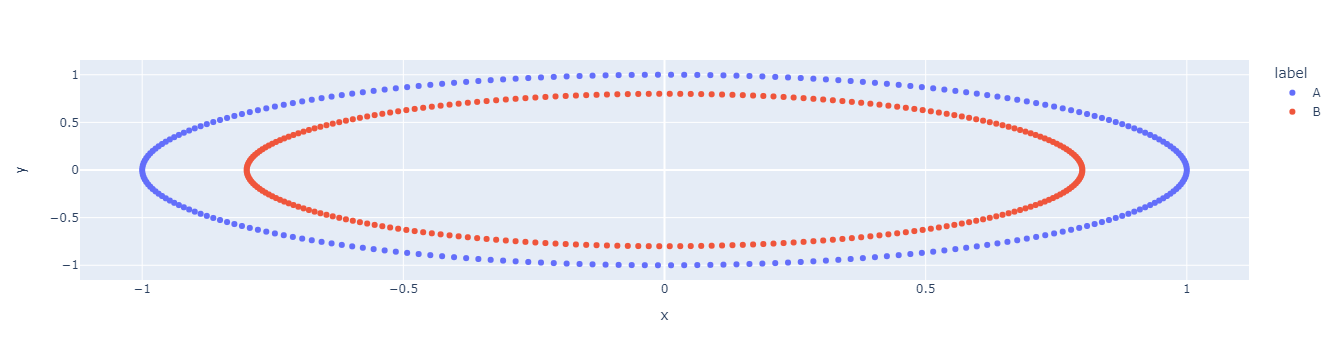

In [49]:
px.scatter(circles_df, x='x', y='y', color = 'label')

In [50]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

In [51]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
def make_noisy_data_frame(n_samples, noise, shape):
    if shape == 'moon':
        points, label = make_moons(n_samples=n_samples, noise=noise)
        moons_df = pd.DataFrame(points, columns=['x','y'])
        moons_df['label'] = label
        moons_df.label = moons_df.label.map({0:'A', 1:'B'})
        return moons_df
    elif shape == 'circle':
        return make_circles_dataframe(n_samples=n_samples, noise_level=noise)
def init_clf(clf_type, param):
    if clf_type == 'log_reg':
        return LogisticRegression(penalty='l2', C=param)
    elif clf_type == 'svm':
        return svm.SVC(kernel='rbf', gamma=param)

In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [53]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_range = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
hyper_params = {'log_reg':c_range,'svm':gamma_range}


n_range = [5,10,50,100,1000, 10000]
nl_range = [0,0.1,0.2,0.3,0.4, 0.5]
clf_types = ['log_reg','svm']
k_folds = 10
shapes = ['moon','circle']
results = []
results_prct = []
# ADD TEST TO TRAINING / VALIDATION ACCURACY COMPARISION
# THIS IS APPARENTLY AS SIMPLE AS CHANGING THAT FUNCTION VVVVVV
for amount in n_range:
    for nl in nl_range:
        for shape in shapes:
            df = make_noisy_data_frame(n_samples=amount, noise=nl, shape=shape)
            for k in range(k_folds): # SWITCH TO OTHER K_FOLD_CV
                x_train, x_test, y_train, y_test,label_train, label_test = train_test_split(df.x, df.y, df.label, test_size=0.3, random_state=k, stratify=df.label)
                x_train = pd.DataFrame(data={'x':x_train, 'y':y_train})
                x_test = pd.DataFrame(data={'x':x_test, 'y':y_test})
                y_train = pd.DataFrame(data={'label':label_train})
                y_test = pd.DataFrame(data={'label':label_test})
                for clf_type in clf_types:
                    for param in hyper_params[clf_type]:
                        clf = init_clf(clf_type, param)
                        clf.fit(x_train,label_train)
                        y_test_pred = clf.predict(x_test)
                        y_train_pred = clf.predict(x_train)
                        results.append((amount, nl, shape, clf_type, param, k, accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred), (accuracy_score(y_train, y_train_pred)-accuracy_score(y_test, y_test_pred))))
                        results_prct.append((amount, '{:.1%}'.format(nl), shape, clf_type, param, k, '{:.1%}'.format(accuracy_score(y_train, y_train_pred)), '{:.1%}'.format(accuracy_score(y_test, y_test_pred)),'{:.1%}'.format((accuracy_score(y_train, y_train_pred)-accuracy_score(y_test, y_test_pred)))))
results = pd.DataFrame(results, columns=['amount - N', 'noise level - NL', 'shape', 'CLF_NAME', 'param - gamma / regularization parameter c', 'k', 'train accuracy_score - TRE', 'test accuracy_score - TESTE','E_DIFF'])
results_prct = pd.DataFrame(results_prct, columns=['amount - N', 'noise level - NL', 'shape', 'CLF_NAME', 'param - gamma / regularization parameter c', 'k', 'train accuracy_score - TRE', 'test accuracy_score - TESTE','E_DIFF'])
results_prct


Wall time: 1h 31min 45s


,amount - N,noise level - NL,shape,CLF_NAME,param - gamma / regularization parameter c,k,train accuracy_score - TRE,test accuracy_score - TESTE,E_DIFF
0,5,0.0%,moon,log_reg,0.001,0,66.7%,50.0%,16.7%
1,5,0.0%,moon,log_reg,0.010,0,66.7%,50.0%,16.7%
2,5,0.0%,moon,log_reg,0.100,0,66.7%,50.0%,16.7%
3,5,0.0%,moon,log_reg,1.000,0,66.7%,50.0%,16.7%
4,5,0.0%,moon,log_reg,10.000,0,66.7%,50.0%,16.7%
...,...,...,...,...,...,...,...,...,...
10075,10000,50.0%,circle,svm,0.100,9,57.6%,55.8%,1.8%
10076,10000,50.0%,circle,svm,1.000,9,58.2%,55.5%,2.7%
10077,10000,50.0%,circle,svm,10.000,9,59.1%,55.1%,4.0%
10078,10000,50.0%,circle,svm,100.000,9,67.7%,51.6%,16.1%


In [84]:
# results.to_csv('data/results')
# results_prct.to_csv('data/results_prct')
# test_res = pd.read_csv('data/results')
# test_res=test_res.loc[:,'amount - N':]

In [83]:
results

,amount - N,noise level - NL,shape,CLF_NAME,param - gamma / regularization parameter c,k,train accuracy_score - TRE,test accuracy_score - TESTE,E_DIFF
0,5,0.0,moon,log_reg,0.001,0,0.666667,0.500000,0.166667
1,5,0.0,moon,log_reg,0.010,0,0.666667,0.500000,0.166667
2,5,0.0,moon,log_reg,0.100,0,0.666667,0.500000,0.166667
3,5,0.0,moon,log_reg,1.000,0,0.666667,0.500000,0.166667
4,5,0.0,moon,log_reg,10.000,0,0.666667,0.500000,0.166667
...,...,...,...,...,...,...,...,...,...
10075,10000,0.5,circle,svm,0.100,9,0.575714,0.558000,0.017714
10076,10000,0.5,circle,svm,1.000,9,0.581714,0.554667,0.027048
10077,10000,0.5,circle,svm,10.000,9,0.590857,0.550667,0.040190
10078,10000,0.5,circle,svm,100.000,9,0.677143,0.516000,0.161143


### Analysing the expermient results

### Answers:

#### Q1 - What is the best model and model params? How stable is it?

In [229]:
# results.rename({'amount - N':'N', 'noise level - NL':'NL', 'shape':'shape', 'CLF_NAME':'CLF_NAME',
#        'param - gamma / regularization parameter c':'param', 'k':'k',
#        'train accuracy_score - TRE':'TRE' , 'test accuracy_score - TESTE':'TESTE' , 'E_DIFF':'E_DIFF'}, axis=1, inplace=True) #errors='raise'
nl_label = 'NL'
teste_label = 'TESTE'
results.query(f' {nl_label} > 0.0 and {teste_label} < 1.0', engine='python').TESTE.idxmax() #, engine='python'
# results.loc[8691]
# results.dtypes
# results
results.groupby(['CLF_NAME','param']).TESTE.agg(['mean','std'])
results[results.CLF_NAME=='svm'].groupby(['NL','param']).TESTE.agg(['mean','std']).unstack('NL')

mean                                                    \
NL             0.0       0.1       0.2       0.3       0.4       0.5   
param                                                                  
0.001     0.535914  0.538850  0.532614  0.529986  0.541458  0.543078   
0.010     0.555967  0.552953  0.554375  0.546872  0.555081  0.562625   
0.100     0.660239  0.651597  0.620506  0.594017  0.608686  0.573828   
1.000     0.733333  0.696717  0.617944  0.636739  0.616900  0.552022   
10.000    0.746944  0.707519  0.641792  0.625775  0.579714  0.547419   
100.000   0.746944  0.683753  0.615439  0.588950  0.557589  0.534189   
1000.000  0.705000  0.617703  0.554233  0.528719  0.525828  0.506394   

               std                                                    
NL             0.0       0.1       0.2       0.3       0.4       0.5  
param                                                                 
0.001     0.172782  0.171835  0.166401  0.167808  0.169343  0.167883  
0.010     0.188569  0.181447  0.177841  0.176755  0.171387  0.171873  
0.100     0.251597  0.221875  0.203887  0.196944  0.184844  0.176535  
1.000     0.323525  0.286219  0.281698  0.210770  0.215358  0.227203  
10.000    0.328551  0.281598  0.246623  0.220713  0.200253  0.201729  
100.000   0.279438  0.261572  0.208578  0.199301  0.172280  0.155516  
1000.000  0.279176  0.219663  0.185526  0.158614  0.133219  0.120160

It appears that the best model is svm, and for most NL considered the cest results are given by gamma=1 or 0.1.

#### Q2 - What is the most stable model and model params? How good is it?

In [177]:
results.groupby(['CLF_NAME','param']).TESTE.agg(['mean','std'])

mean       std
CLF_NAME param                       
log_reg  0.001     0.532356  0.164810
         0.010     0.558880  0.181731
         0.100     0.567916  0.198286
         1.000     0.581605  0.233434
         10.000    0.561698  0.265622
         100.000   0.554713  0.270126
         1000.000  0.554204  0.270088
svm      0.001     0.536983  0.168832
         0.010     0.554645  0.177516
         0.100     0.618145  0.208951
         1.000     0.642276  0.266528
         10.000    0.641527  0.259288
         100.000   0.621144  0.228796
         1000.000  0.572980  0.202021

Apparently the most stable model (defined in this case by the lowest standard deviation) is the logistic regression model, with a regularization parameter of 0.001.
With respect to how good it is, it's barely better than a random guess, with an accuracy score of 53.23%.

#### Q3 - Does regularization help for linear models?

In [178]:
results[results.CLF_NAME=='log_reg'].groupby(['CLF_NAME','param']).TESTE.agg(['mean','std'])

mean       std
CLF_NAME param                       
log_reg  0.001     0.532356  0.164810
         0.010     0.558880  0.181731
         0.100     0.567916  0.198286
         1.000     0.581605  0.233434
         10.000    0.561698  0.265622
         100.000   0.554713  0.270126
         1000.000  0.554204  0.270088

The regularization in this case is inversly related to the parameter - and evidently the stronger regularization gives a more stable result, but a less accurate one.
So with respect to "Does it help?", the answer is "Depends on what your parameter for success is - stability or accuracy".

#### Q4 - For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes?

In [207]:
nl03_err_rate=results[results.NL==0.3].loc[:,['N','TRE','TESTE','E_DIFF']]
nl03_err_rate.groupby('N').agg(['mean','std'])

TRE               TESTE              E_DIFF          
           mean       std      mean       std      mean       std
N                                                                
5      0.836905  0.166927  0.498214  0.155532  0.338690  0.239621
10     0.723469  0.182001  0.353571  0.164524  0.369898  0.230338
50     0.715918  0.186134  0.579286  0.177866  0.136633  0.188901
100    0.754745  0.171329  0.597381  0.201925  0.157364  0.159689
1000   0.731020  0.174468  0.683071  0.168402  0.047949  0.103181
10000  0.719984  0.167400  0.704175  0.171506  0.015809  0.052300

For a noise level of 30%, the difference between test and train error diminishes with more data, the train accuracy remains almost constant over 5 data points, and the test accuracy rises with every additional data point over 50.

#### Q5 - For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity?

In [212]:
nl03_err_rate_svm=results.query('NL==0.3 and CLF_NAME=="svm"').loc[:,['param','TRE','TESTE','E_DIFF']]
nl03_err_rate_svm.groupby('param').agg(['mean','std'])

TRE               TESTE              E_DIFF          
              mean       std      mean       std      mean       std
param                                                               
0.001     0.626138  0.119372  0.529986  0.167808  0.096152  0.095815
0.010     0.642248  0.121968  0.546872  0.176755  0.095376  0.100034
0.100     0.693762  0.123006  0.594017  0.196944  0.099745  0.136032
1.000     0.802420  0.141101  0.636739  0.210770  0.165681  0.206420
10.000    0.889663  0.122667  0.625775  0.220713  0.263888  0.254531
100.000   0.942858  0.098079  0.588950  0.199301  0.353908  0.235276
1000.000  0.978936  0.048589  0.528719  0.158614  0.450216  0.178232

For a noise level of 30%, training accuracy steadiliy increased as the model complexity did, showing a classic overfit scenario.
Test error started terrible and gradually increased, finding a "peak" at around $\gamma$ = 1 and the difference error increased with model complexity.

#### Q6 - Are the noise level effect the number of datapoints needed to reach minimal test results?

In [226]:
results.loc[:,['N','NL','TESTE']].groupby(['NL','N']).agg('mean').unstack('NL')

TESTE                                                  
NL          0.0       0.1       0.2       0.3       0.4       0.5
N                                                                
5      0.453571  0.455357  0.446429  0.498214  0.485714  0.439286
10     0.332143  0.332143  0.351190  0.353571  0.401190  0.352381
50     0.602619  0.600000  0.566667  0.579286  0.578333  0.544286
100    0.714405  0.677024  0.622500  0.597381  0.633571  0.603571
1000   0.775893  0.747762  0.708060  0.683071  0.679571  0.662881
10000  0.800642  0.766089  0.730604  0.704175  0.682436  0.664169

The noise level affects the level at which more data does not equal more accuracy - this is especially apparent at 50% noise, but can be seen at most NLs.

#### Q7 - Select the best model param to fit the data (The one minimizing the test error) and for it, observe the number of data points needed for optimal test results in different noise levels.

In [230]:
results.query('CLF_NAME=="svm" and param == 1 ').loc[:,['N','NL','TESTE']].groupby(['NL','N']).agg('mean').unstack('NL')

TESTE                                                  
NL          0.0       0.1       0.2       0.3       0.4       0.5
N                                                                
5      0.475000  0.450000  0.400000  0.500000  0.475000  0.350000
10     0.266667  0.283333  0.283333  0.383333  0.450000  0.416667
50     0.696667  0.736667  0.636667  0.700000  0.593333  0.530000
100    0.961667  0.868333  0.745000  0.708333  0.715000  0.626667
1000   1.000000  0.923333  0.811333  0.755667  0.741833  0.692167
10000  1.000000  0.918633  0.831333  0.773100  0.726233  0.696633

It looks as though the optimal amount of data is around 100-1000, depending on noise level.